In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

In [ ]:
df=pd.read_csv("/content/demodt.txt")
df

,State,Literacy,Cleanliness,Crime_Rate,Good
0,A,92,90,54,0
1,B,56,67,50,1
2,C,78,85,62,0
3,D,63,72,48,1
4,E,85,79,55,0
5,F,71,68,58,0
6,G,80,83,51,0
7,H,67,74,47,1
8,I,89,88,53,0
9,J,58,65,49,1


In [ ]:
feature_cols=['Literacy','Cleanliness','Crime_Rate']
feature = df[feature_cols] #Featues
Target = df.Good  #Target variable

In [ ]:
from sklearn.linear_model import LinearRegression
model = DecisionTreeClassifier()
#train the model
model.fit(feature,Target)

In [ ]:
p1=int(input("enter literacy"))
p2=int(input("enter cleanliness"))
p3=int(input("enter crime rate"))
pred=model.predict([[p1,p2,p3]])
if pred == 1:
  print("Good city")
else:
  print("bad city")

enter literacy94
enter cleanliness90
enter crime rate54
bad city


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
pre=model.predict([[94,90,54]])
print(pre)
if pre == 1:
  print("Good City")
else:
  print("Bad City")

[0]
Bad City


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import export_graphviz,plot_tree

[Text(0.5, 0.75, 'x[2] <= 50.5\ngini = 0.488\nsamples = 26\nvalue = [15, 11]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]')]

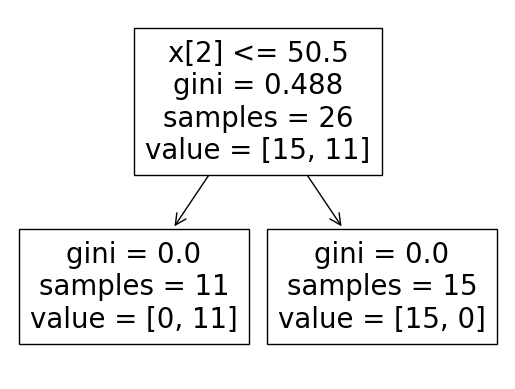

In [ ]:
plot_tree(model) #plot_tree(trained model name)

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=10)
RF.fit(feature,Target)

RandomForestClassifier(n_estimators=10)

In [ ]:
pre=RF.predict([[80,83,51]])
print(pre)
if pre == 1:
  print("Good City")
else:
  print("Bad City")

[0]
Bad City


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Saving all Decision Trees
import os
output_dir = "tree_visualizations"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
RF.estimators_ #model name

[DecisionTreeClassifier(max_features='sqrt', random_state=1916427799),
 DecisionTreeClassifier(max_features='sqrt', random_state=34580060),
 DecisionTreeClassifier(max_features='sqrt', random_state=727835530),
 DecisionTreeClassifier(max_features='sqrt', random_state=1249136565),
 DecisionTreeClassifier(max_features='sqrt', random_state=785414063),
 DecisionTreeClassifier(max_features='sqrt', random_state=1055628582),
 DecisionTreeClassifier(max_features='sqrt', random_state=1595497467),
 DecisionTreeClassifier(max_features='sqrt', random_state=1399874582),
 DecisionTreeClassifier(max_features='sqrt', random_state=611111296),
 DecisionTreeClassifier(max_features='sqrt', random_state=810148849)]

In [ ]:
for i, tree in enumerate(RF.estimators_):
    tree_dot_file = os.path.join(output_dir, F"tree_{i}.dot")
    tree_png_file = os.path.join(output_dir, F"tree_{i}.png")

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file=tree_dot_file, feature_names=["Literacy", "Cleanliness", "Crime_Rate"],
                    class_names=[str(cls) for cls in RF.classes_], filled=True, rounded=True)

In [ ]:
command = f"dot -Tpng {tree_dot_file} -o {tree_png_file}"
os.system(command)
print(f"Tree {i} visualization saved to {tree_png_file}")

Tree 9 visualization saved to tree_visualizations/tree_9.png


Project


In [ ]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz,plot_tree
from IPython.display import Image

In [ ]:
df1 = pd.read_csv("/content/Project3.csv")
df1

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Status
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [ ]:
feature1=['Income','LoanAmount','MonthsEmployed','DTIRatio']
feature2 = df1.loc[0:99,feature1] #Features
Target1 = df1.loc[0:99,'Status']  #Target variable

In [ ]:
from sklearn.linear_model import LinearRegression
model1 =LinearRegression()
model1.fit(feature2,Target1)

NameError: name 'feature2' is not defined

In [ ]:
v1=int(input("enter Income"))
v2=int(input("enter LoanAmount"))
v3=input("enter MonthsEmployed")
v4=input("enter DTIRatio")
predict=model1.predict([[v1,v2,v3,v4]])
if predict == 1:
  print("Loan will be sanctioned")
else:
  print("Improve your credits and try again")

enter Income50432
enter LoanAmount124440
enter MonthsEmployed15.0
enter DTIRatio0.68
Improve your credits and try again


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.6019736842105263, 0.9583333333333334, 'x[2] <= 115.5\ngini = 0.241\nsamples = 100\nvalue = [86, 14]'),
 Text(0.4967105263157895, 0.875, 'x[1] <= 76434.5\ngini = 0.219\nsamples = 96\nvalue = [84, 12]'),
 Text(0.4440789473684211, 0.7916666666666666, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.5493421052631579, 0.7916666666666666, 'x[3] <= 0.79\ngini = 0.284\nsamples = 70\nvalue = [58, 12]'),
 Text(0.2565789473684211, 0.7083333333333334, 'x[3] <= 0.125\ngini = 0.242\nsamples = 64\nvalue = [55, 9]'),
 Text(0.20394736842105263, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3092105263157895, 0.625, 'x[0] <= 25008.0\ngini = 0.222\nsamples = 63\nvalue = [55, 8]'),
 Text(0.13157894736842105, 0.5416666666666666, 'x[1] <= 166095.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.07894736842105263, 0.4583333333333333, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.18421052631578946, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4868

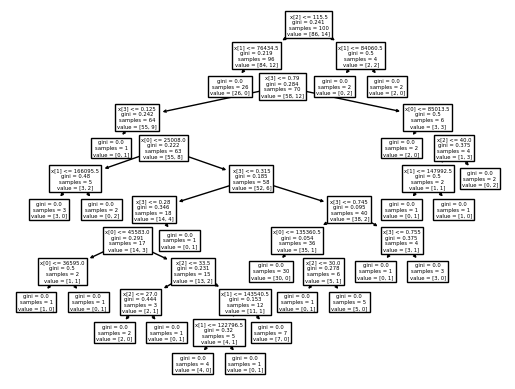

In [ ]:
plot_tree(model1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF1 = RandomForestClassifier(n_estimators=10)
RF1.fit(feature2,Target1)

RandomForestClassifier(n_estimators=10)

In [ ]:
v1=int(input("enter Income"))
v2=int(input("enter LoanAmount"))
v3=input("enter MonthsEmployed")
v4=input("enter DTIRatio")
predict=model1.predict([[v1,v2,v3,v4]])
if predict == 1:
  print("Loan will be sanctioned")
else:
  print("Improve your credits and try again")

enter Income50432
enter LoanAmount124440
enter MonthsEmployed15.0
enter DTIRatio0.68
Improve your credits and try again


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import os
output_dir = "tree_visualizations"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
RF1.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=773330505),
 DecisionTreeClassifier(max_features='sqrt', random_state=914158352),
 DecisionTreeClassifier(max_features='sqrt', random_state=261712605),
 DecisionTreeClassifier(max_features='sqrt', random_state=1453895134),
 DecisionTreeClassifier(max_features='sqrt', random_state=437986299),
 DecisionTreeClassifier(max_features='sqrt', random_state=494896785),
 DecisionTreeClassifier(max_features='sqrt', random_state=385030490),
 DecisionTreeClassifier(max_features='sqrt', random_state=584118726),
 DecisionTreeClassifier(max_features='sqrt', random_state=1230918972),
 DecisionTreeClassifier(max_features='sqrt', random_state=1789068463)]

In [ ]:
for i, tree in enumerate(RF1.estimators_):
    tree_dot_file = os.path.join(output_dir, F"tree_{i}.dot")
    tree_png_file = os.path.join(output_dir, F"tree_{i}.png")

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file=tree_dot_file, feature_names=["Income", "LoanAmount", "MonthsEmployed", "DTIRatio"],
                    class_names=[str(cls) for cls in RF1.classes_], filled=True, rounded=True)

In [ ]:
command = f"dot -Tpng {tree_dot_file} -o {tree_png_file}"
os.system(command)
print(f"Tree {i} visualization saved to {tree_png_file}")

Tree 9 visualization saved to tree_visualizations/tree_9.png


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz,plot_tree
from IPython.display import Image

In [ ]:
Mod1= LinearRegression()

In [ ]:
d1 = pd.read_csv("/content/Project3.csv")
d1

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Status
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [ ]:
t=np.array([i for i in d1["Income"]]).reshape(-1,1)
p=d1["LoanAmount"]

In [ ]:
#p=d1.loc[0:99,"LoanAmount"]

In [ ]:
Mod1.fit(t,p)

LinearRegression()

In [ ]:
m=int(input("Enter LoanAmount:"))
LA=(Mod1.predict([[m]]))
print(LA)
if(LA>100000 or LA<210000):
  print("Bachelor's in Education")
elif(LA>190000 or LA<40000):
  print("High School in Education")
else:
  print("Master's in Education")

Enter LoanAmount:50587
[127629.07295369]
Bachelor's in Education
